# Genrating Sentiment Rating

## Importing necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting labelled data
from nltk.corpus import stopwords # dealing with stop words

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Reading the dataset

In [3]:
df = pd.read_csv("C:/Users/Jatin/Downloads/Major Project/Dataset/Sentiment Analysis/HotelReview1to5.csv", encoding = "ISO-8859-1")
df.head()

,S.No.,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,unique \tgreat stay \twonderful time hotel mon...,5
4,5,great stay great stay \twent seahawk game awes...,5


In [4]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
S.No.     20491 non-null int64
Review    20491 non-null object
Rating    20491 non-null int64
dtypes: int64(2), object(1)
memory usage: 480.3+ KB


In [5]:
df.drop("S.No.", axis = 1, inplace = True)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,unique \tgreat stay \twonderful time hotel mon...,5
4,great stay great stay \twent seahawk game awes...,5


In [6]:
num_counts = df["Rating"].value_counts()
num_counts

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

The target column Sentiment contains the labels for the reviews. There are five classes in which a review is classified.

0 - negative

1 - somewhat negative

2 - neutral

3 - somewhat positive

4 - positive

<BarContainer object of 5 artists>

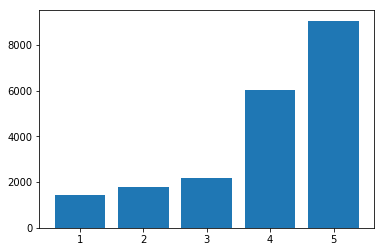

In [7]:
plt.bar(x = num_counts.index,height = num_counts)

From the bar graph it is seen that the majority of the reviews are classified to be of rating 5.

In [8]:
grouped = df.groupby("Rating")
equal_df = pd.DataFrame(columns = ["Review", "Rating"])

for name, group in grouped:
    group = group.sample(n = 1421)
    equal_df = equal_df.append(group)
    
equal_df.reset_index(inplace = True, drop = True)
equal_df.head()

,Review,Rating
0,not resort motel resort nothing like web page ...,1
1,kahala hawaiian word means overrated begin exp...,1
2,worst western \tbooked hotel including air bos...,1
3,terrible word \thotel great location centre fl...,1
4,husband perused website anticipation 5 night v...,1


In [9]:
equal_df["Rating"].value_counts()

5    1421
4    1421
3    1421
2    1421
1    1421
Name: Rating, dtype: int64

In [10]:
equal_df.shape

(7105, 2)

## Preprocessing of text

Text Preprocessing is a process of converting and cleaning of the dataset so that it can be easily fed into the machine learning algorithm for its proper functioning and giving higher accuracy

### A) Removing Punctiations

In [11]:
import string
table = str.maketrans("", "", string.punctuation + "\t")

In [12]:
equal_df['Review'] = equal_df['Review'].apply(lambda x: x.translate(table))
equal_df.head()

,Review,Rating
0,not resort motel resort nothing like web page ...,1
1,kahala hawaiian word means overrated begin exp...,1
2,worst western booked hotel including air bosto...,1
3,terrible word hotel great location centre flor...,1
4,husband perused website anticipation 5 night v...,1


In [13]:
print(equal_df.iloc[0, 0])

not resort motel resort nothing like web page little worried wife booked trip kids did nt little searching look really poor web page kid did lunch break no large pictures motel page does nt clear picture likely saw trashed beachsecond not 21 different activates kids bored trip not large family nt know came maybe gm manager list desk sure nt nothing worst talking speak language worker happen times feeling talking family main problem resort rooms dirty pools filled bugs daughter nt swim 5day trip ocean not swimable not waves rough large rocks beach area beach lot trashed bottles oh better bring towels visit motel resort usually live entertainment hot tub towels near pool beach desk course continued speak language rooms not rugged floor dirty bugs thought rooms nt desk work couch ripped area called head time roll away bed got used come later 2 rollaway beds 50 rooms called rooms suite just large motel room finely check did come room help bags check took 45 minutes called taxi did nt credi

### B) Removing numbers

In [14]:
import re
equal_df["Review"] = equal_df["Review"].apply(lambda x: re.sub("[0-9]+", "", x))
print(equal_df.iloc[0, 0])

not resort motel resort nothing like web page little worried wife booked trip kids did nt little searching look really poor web page kid did lunch break no large pictures motel page does nt clear picture likely saw trashed beachsecond not  different activates kids bored trip not large family nt know came maybe gm manager list desk sure nt nothing worst talking speak language worker happen times feeling talking family main problem resort rooms dirty pools filled bugs daughter nt swim day trip ocean not swimable not waves rough large rocks beach area beach lot trashed bottles oh better bring towels visit motel resort usually live entertainment hot tub towels near pool beach desk course continued speak language rooms not rugged floor dirty bugs thought rooms nt desk work couch ripped area called head time roll away bed got used come later  rollaway beds  rooms called rooms suite just large motel room finely check did come room help bags check took  minutes called taxi did nt credit cards 

### C) Lower Casing

In [15]:
equal_df['Review'] = equal_df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
equal_df.head()

,Review,Rating
0,not resort motel resort nothing like web page ...,1
1,kahala hawaiian word means overrated begin exp...,1
2,worst western booked hotel including air bosto...,1
3,terrible word hotel great location centre flor...,1
4,husband perused website anticipation night vac...,1


### D) Stopwords Removal

In [16]:
stop = stopwords.words('english')
equal_df['Review'] = equal_df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
equal_df.head()

,Review,Rating
0,resort motel resort nothing like web page litt...,1
1,kahala hawaiian word means overrated begin exp...,1
2,worst western booked hotel including air bosto...,1
3,terrible word hotel great location centre flor...,1
4,husband perused website anticipation night vac...,1


### E) Stemming

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.
Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

In [17]:
from nltk.stem import PorterStemmer

In [18]:
stemmer = PorterStemmer()
equal_df['Review'] = equal_df['Review'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
equal_df.head()

,Review,Rating
0,resort motel resort noth like web page littl w...,1
1,kahala hawaiian word mean overr begin express ...,1
2,worst western book hotel includ air boston nig...,1
3,terribl word hotel great locat centr florenc w...,1
4,husband perus websit anticip night vacat week ...,1


### Splitting Dataset

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(equal_df.Review, equal_df.Rating, test_size = 0.25, random_state = 42)
ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

In [20]:
ytrain.value_counts()

4    1097
2    1065
3    1063
5    1059
1    1044
Name: Rating, dtype: int64

# Feature Extraction

Text data requires special preparation before you can start using it for predictive modeling. The text must be parsed to remove words, called tokenization. Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature extraction (or vectorization).

Here, we will use two approaches for feature Extraction:

1) Using **CountVectorizer**: converts text to word count vector

2) Using **TfidfVectorizer**: converts text to word frequency vectors

## (i) Count Vectorizer

CountVectorizer basically implements **Bag of Words** model, where it tokenizes the words in the corpus and builds a dictionary. The count or frequency of the words present in the document is stored in the dictionary if the dictionary contains that word.

Here, we have taken the top 1000 words which occurs most throught the corpus.

In [21]:
cv = CountVectorizer(max_features=3000)
xtrain_cv = cv.fit_transform(xtrain)
xtrain_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
len(cv.vocabulary_)

3000

In [23]:
cv.get_feature_names()

['aaa',
 'abc',
 'abil',
 'abl',
 'absolut',
 'abund',
 'ac',
 'accept',
 'access',
 'accid',
 'accommod',
 'accomod',
 'accord',
 'account',
 'accross',
 'accur',
 'accus',
 'accustom',
 'acknowledg',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'add',
 'addit',
 'address',
 'adequ',
 'adjac',
 'adjoin',
 'adjust',
 'admit',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'aerob',
 'affect',
 'affinia',
 'afford',
 'afraid',
 'afternoon',
 'age',
 'agenc',
 'agent',
 'aggress',
 'ago',
 'agre',
 'ahead',
 'air',
 'aircon',
 'aircondit',
 'airi',
 'airlin',
 'airport',
 'al',
 'ala',
 'alarm',
 'albeit',
 'alcatraz',
 'alcohol',
 'alley',
 'allinclus',
 'alloc',
 'allow',
 'allth',
 'alot',
 'alright',
 'altern',
 'amaz',
 'amazingli',
 'ambianc',
 'ambienc',
 'amen',
 'america',
 'american',
 'ammen',
 'amount',
 'ampl',
 'amsterdam',
 'andor',
 'andra',
 'angri',
 'anim',
 'ann',
 'anniversari',
 'annoy',
 'answer',
 'ant',
 'antibiot',

In [24]:
xtest_cv = cv.transform(xtest)
xtest_cv

<1777x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 123198 stored elements in Compressed Sparse Row format>

## (ii) TfidfVectorizer 

TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.

* Inverse Document Frequency: This downscales words that appear a lot across documents.

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

TfidfVectorizer can lowercase letters, disregard punctuation and stopwords.

In [25]:
tv = TfidfVectorizer(max_features = 3000)
xtrain_tv = tv.fit_transform(xtrain)
xtest_tv = tv.transform(xtest)
tv.get_feature_names()

['aaa',
 'abc',
 'abil',
 'abl',
 'absolut',
 'abund',
 'ac',
 'accept',
 'access',
 'accid',
 'accommod',
 'accomod',
 'accord',
 'account',
 'accross',
 'accur',
 'accus',
 'accustom',
 'acknowledg',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'add',
 'addit',
 'address',
 'adequ',
 'adjac',
 'adjoin',
 'adjust',
 'admit',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'aerob',
 'affect',
 'affinia',
 'afford',
 'afraid',
 'afternoon',
 'age',
 'agenc',
 'agent',
 'aggress',
 'ago',
 'agre',
 'ahead',
 'air',
 'aircon',
 'aircondit',
 'airi',
 'airlin',
 'airport',
 'al',
 'ala',
 'alarm',
 'albeit',
 'alcatraz',
 'alcohol',
 'alley',
 'allinclus',
 'alloc',
 'allow',
 'allth',
 'alot',
 'alright',
 'altern',
 'amaz',
 'amazingli',
 'ambianc',
 'ambienc',
 'amen',
 'america',
 'american',
 'ammen',
 'amount',
 'ampl',
 'amsterdam',
 'andor',
 'andra',
 'angri',
 'anim',
 'ann',
 'anniversari',
 'annoy',
 'answer',
 'ant',
 'antibiot',

# Model selection

* Multinomial Naive Bayes
* Logistic Regression
* Linear Support Vector Machine


### A) Multinomial Naive Bayes

In [26]:
mnb_cv = MultinomialNB(alpha = 0.5)
mnb_cv.fit(xtrain_cv, ytrain)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [27]:
print('Accuracy of Naive Bayes using Count Vectorizer: ', mnb_cv.score( xtest_cv , ytest))

Accuracy of Naive Bayes using Count Vectorizer:  0.526167698368036


In [28]:
mnb_tv = MultinomialNB()
mnb_tv.fit(xtrain_tv, ytrain)
print('Accuracy of Naive Bayes using Tf-Idf Vectorizer: ', mnb_tv.score( xtest_tv , ytest))

Accuracy of Naive Bayes using Tf-Idf Vectorizer:  0.5351716375914463


### B) Logistic Regression


** Count Vectorizer**

In [29]:
lr_cv = LogisticRegression(C = 1)
lr_cv.fit(xtrain_cv, ytrain)
print('Accuracy of Logistic Regression using CountVectorizer: ', lr_cv.score( xtest_cv , ytest))

Accuracy of Logistic Regression using CountVectorizer:  0.5070343275182893


**Tf-idf Vectorizer**

In [30]:
lr_tv = LogisticRegression(C = 1)
lr_tv.fit(xtrain_tv, ytrain)
print('Accuracy of Logistic Regression using Tf_Idf Vectorizer: ', lr_tv.score( xtest_tv , ytest))

Accuracy of Logistic Regression using Tf_Idf Vectorizer:  0.5700619020821609


### C) Linear SVC

**CountVectorizer**

In [31]:
from sklearn.svm import LinearSVC
svm_cv = LinearSVC(dual = False)
svm_cv.fit(xtrain_cv, ytrain)
print('Accuracy of SVM using CountVectorizer: ', svm_cv.score( xtest_cv , ytest))

Accuracy of SVM using CountVectorizer:  0.4704558244231851


**Tf-idf Vectorizer**

In [32]:
svm_tv = LinearSVC(dual = False)
svm_tv.fit(xtrain_tv, ytrain)
print('Accuracy of SVM using Tf-Idf Vectorizer: ', svm_tv.score( xtest_tv , ytest))

Accuracy of SVM using Tf-Idf Vectorizer:  0.5149127743387732


In [33]:
cv_list = cv.get_feature_names()
tv_list = tv.get_feature_names()
count = 0
for i in range(3000):
    if(cv_list[i] == cv_list[i]):
        count = count + 1
    
print(count)

3000


## Accuracy for binary classification

In [55]:
predicted_rating = mnb_cv.predict(xtest_cv)
predicted_rating

array([3, 4, 4, ..., 4, 4, 1])

In [56]:
xtest.index

Int64Index([6421, 5681, 4678, 4834, 5652, 4955, 2413,  318, 5908, 3303,
            ...
            1514, 4674, 5061, 2191, 3358,  555, 5095, 3614, 6611, 1485],
           dtype='int64', length=1777)

In [57]:
bi_test_df = equal_df.loc[xtest.index]
bi_test_df["Predicted rating"] = predicted_rating
bi_test_df.reset_index(inplace = True, drop = True)
bi_test_df.head()

,Review,Rating,Predicted rating
0,rampant escapad say singl lone lazi parrot ide...,5,3
1,ideal locat frill clean room hotel block beach...,4,4
2,stay uniervers appoint excel clean modern room...,4,4
3,vfm night hour actual airport hotel say realli...,4,5
4,love boutiqu hotel stay agora comfort great lo...,4,5


In [58]:
bi_test_df = bi_test_df[bi_test_df["Rating"] != 3]
bi_test_df.shape

(1419, 3)

In [59]:
bi_test_df.head()

,Review,Rating,Predicted rating
0,rampant escapad say singl lone lazi parrot ide...,5,3
1,ideal locat frill clean room hotel block beach...,4,4
2,stay uniervers appoint excel clean modern room...,4,4
3,vfm night hour actual airport hotel say realli...,4,5
4,love boutiqu hotel stay agora comfort great lo...,4,5


In [60]:
def split(num):
    if num>3:
        return 1
    else:
        return 0

In [61]:
bi_test_df["Actual Polarity"] = bi_test_df["Rating"].apply(split)
bi_test_df

,Review,Rating,Predicted rating,Actual Polarity
0,rampant escapad say singl lone lazi parrot ide...,5,3,1
1,ideal locat frill clean room hotel block beach...,4,4,1
2,stay uniervers appoint excel clean modern room...,4,4,1
3,vfm night hour actual airport hotel say realli...,4,5,1
4,love boutiqu hotel stay agora comfort great lo...,4,5,1
5,terrif trip wife went secret week april sister...,4,4,1
6,uncomfort hotel hotel locat dirti street stink...,2,3,0
7,love hotel husband stay embassi suit phoenixsc...,1,2,0
8,absolut perfect locat great room great price h...,5,5,1
10,riu bambu got day stretch place say servic sta...,2,2,0


In [62]:
def get_polar(row):
    if row["Predicted rating"] == 3:
        return row["Actual Polarity"]
    elif row["Predicted rating"] > 3:
        return 1
    else:
        return 0

In [63]:
bi_test_df["Predicted Polarity"] = bi_test_df[["Predicted rating", "Actual Polarity"]].apply(get_polar, axis = 1)
bi_test_df

,Review,Rating,Predicted rating,Actual Polarity,Predicted Polarity
0,rampant escapad say singl lone lazi parrot ide...,5,3,1,1
1,ideal locat frill clean room hotel block beach...,4,4,1,1
2,stay uniervers appoint excel clean modern room...,4,4,1,1
3,vfm night hour actual airport hotel say realli...,4,5,1,1
4,love boutiqu hotel stay agora comfort great lo...,4,5,1,1
5,terrif trip wife went secret week april sister...,4,4,1,1
6,uncomfort hotel hotel locat dirti street stink...,2,3,0,0
7,love hotel husband stay embassi suit phoenixsc...,1,2,0,0
8,absolut perfect locat great room great price h...,5,5,1,1
10,riu bambu got day stretch place say servic sta...,2,2,0,0


In [74]:
total = bi_test_df.shape[0]
count = 0
for _, row in bi_test_df.iterrows():
    if row["Actual Polarity"] == row["Predicted Polarity"]:
        count = count + 1

In [77]:
print("Accuracy is " + str((count/total)*100))

Accuracy is 95.34883720930233
